# Lesson 1: Exercise 1

## Creating Data and Backtesting a Trading Strategy

---

## Overview

Welcome to this Exercise. We are now going to put our skills to the test and create a dataset and prepare our first backtests. Proper data preparation is essential to conducting succesful backtest, and we want to make sure that we build a solid foundation and develop proper techniques to ensure that we can build our datasets easily at scale and develop proper data wrangling and preparation approaches. In particular, we are going to cover the  essential steps that are necessary to succesfully build trading  models beginning from creating datasets from publicly available stock price data to conducting exploratory data analysis to finally building and testing models. We are then quickly shifts gears and illustrate a few advanced investment ideas that can be used for further analysis.

Let's start by upgrading the `yfinance` module to the latest version. Run the following code block to upgrade it, then click the menu item at the top: **Kernel** > **Restart**, before running the remaining code blocks.

In [2]:
!pip install --upgrade yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)


In [3]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))
# Add the path to sys.path
sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
#  Create a variable named 'historical_prices' to store historical price data between the dates'2005-01-01' and '2015-01-01'. Use the function 'create_hist_prices()' from 'func_lib' to generate or retrieve the historical prices.
historical_prices = func_lib.create_hist_prices(start_date = '2005-01-01', end_date = '2015-01-01')
# Create a list named 'list_of_momentums' and add 1 to the list
list_of_momentums = [1]
# Compute the total returns using the historical prices and the list of momentums. Use the 'compute_returns()' function from 'func_lib'. Pass 'historical_prices' and 'list_of_momentums' as arguments to 'func_lib.compute_returns()'.
# - Store the result in a variable named 'total_returns'.
total_returns     = func_lib.compute_returns(historical_prices, list_of_momentums)
# Use the 'dropna()' method on the 'total_returns' DataFrame.
total_returns.dropna(inplace=True)

[*********************100%***********************]  501 of 501 completed

34 Failed downloads:
['FOXA', 'HPE', 'KHC', 'PYPL', 'GEHC', 'DASH', 'EXE', 'KVUE', 'ABNB', 'MRNA', 'PLTR', 'FTV', 'OTIS', 'CARR', 'CTVA', 'VST', 'CRWD', 'GDDY', 'DOW', 'UBER', 'VLTO', 'COIN', 'LW', 'DELL', 'SOLV', 'HWM', 'VICI', 'DAY', 'SW', 'FOX', 'INVH', 'IR', 'CEG', 'GEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2005-01-01 -> 2015-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1420088400")')


In [5]:
# Print the first 5 lines of total returns
total_returns.head(5)

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2005-01-04      -0.000430    -0.026382
       2005-01-05      -0.021945    -0.000430
       2005-01-06      -0.000880    -0.021945
       2005-01-07      -0.004844    -0.000880
       2005-01-10      -0.017257    -0.004844

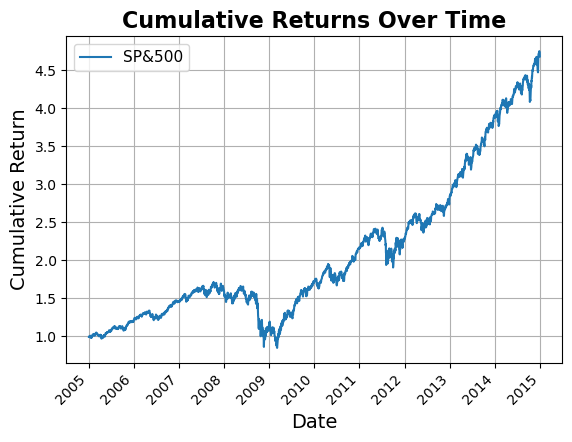

The CAGR is: 16.79%
Sharpe Ratio of Strategy: 0.8


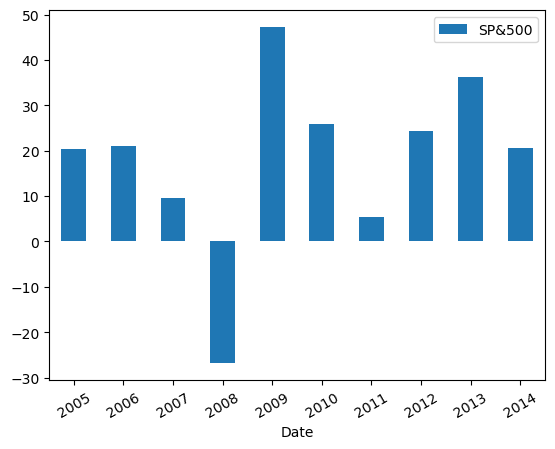

In [6]:
# Compute cumulative and calendar returns from the total returns data. 
# Use the 'compute_BM_Perf()' function from 'func_lib' to perform this calculation. 
# Pass 'total_returns' as an argument to 'func_lib.compute_BM_Perf()'.
# - The function returns two outputs: 'cum_returns' for cumulative returns and 'calendar_returns' for calendar returns.
# - Assign the outputs to the variables 'cum_returns' and 'calendar_returns' respectively.
cum_returns, calendar_returns = func_lib.compute_BM_Perf(total_returns)

In [7]:
# Calculate the Relative Strength Index (RSI) for each 'Ticker' and add it to the 'total_returns' DataFrame.First, group the 'total_returns' DataFrame by the 'Ticker' column.
# For each group, select the '1_d_returns' column and apply a transformation using the 'calculate_rsi' function from 'func_lib'.
# - Assign the result to a new column named 'RSI' in the 'total_returns' DataFrame.
total_returns = total_returns.sort_index(level=['Ticker', 'Date'])
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(func_lib.calculate_rsi)

In [8]:
# Print out the first 5 rows of the total_returns dataframe
tickers = total_returns.index.get_level_values('Ticker').unique()
print(tickers)
print(total_returns.loc['AAPL'].tail(20))

Index(['A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=464)
            F_1_d_returns  1_d_returns        RSI
Date                                             
2014-12-02       0.011341    -0.003824  55.061007
2014-12-03      -0.003795     0.011341  55.382490
2014-12-04      -0.004243    -0.003795  56.578949
2014-12-05      -0.022609    -0.004243  58.077760
2014-12-08       0.015302    -0.022609  55.682510
2014-12-09      -0.019015     0.015302  56.091631
2014-12-10      -0.002948    -0.019015  54.817043
2014-12-11      -0.016933    -0.002948  54.417924
2014-12-12      -0.013670    -0.016933  51.728979
2014-12-15      -0.013674    -0.013670  50.559334
2014-12-16       0.024918    -0.013674  48.485947
2014-12-17       0.029613     0.024918  52.161203
2014-12-18      -0.007723     0.029613  55.898448
2014-12-19       0.010378    -0.

In [9]:
#  Define a trading strategy function based on the RSI (Relative Strength Index). Create a function named 'trading_strategy' that accepts one parameter: 'rsi'.
# Inside the function, use an if-else statement to implement the trading logic:
#     - If 'rsi' is less than 65, return 1 (indicating a decision to go long).
#     - Otherwise, return 0 (indicating no position or a different strategy).
# - This function will be used later to determine trading actions based on RSI values.
def trading_strategy(rsi):
    return 1 if rsi < 65 else 0


In [10]:
# Create a variable named 'model_name' and set it to the string "RSI".
model_name = "RSI"


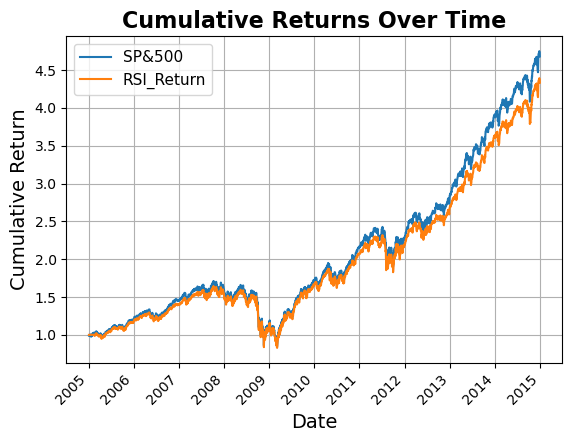

The CAGR is: 15.83%
Sharpe Ratio of Strategy: 0.78


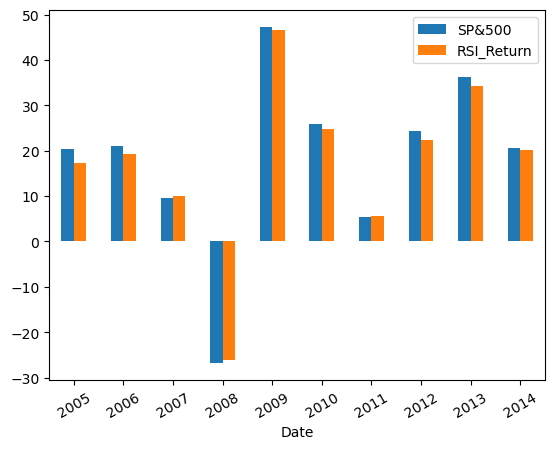

In [11]:
# Compute cumulative and calendar returns for the given trading strategy.
# Use the 'compute_strat_perf()' function from 'func_lib' to perform this calculation.
# Pass 'total_returns', 'cum_returns', 'calendar_returns', 'trading_strategy', and 'model_name' as arguments.
# - The function returns updated 'cum_returns' and 'calendar_returns' based on the strategy's performance.
cum_returns, calendar_returns = func_lib.compute_strat_perf(
    total_returns, cum_returns, calendar_returns, trading_strategy, model_name)


In [12]:
# Create the true values (y_test) indicating whether future 1-day returns (F_1_d_returns) are larger or smaller than 0.
# Use the 'np.where()' function to evaluate the 'F_1_d_returns' column in the 'total_returns' DataFrame.
# Store the result in a new column called 'y_test' in the 'total_returns' DataFrame.

# Copy the values from the 'Position' column of 'total_returns' to a new column named 'y_pred'.
total_returns['y_test'] = np.where(total_returns['F_1_d_returns'] > 0, True, False)
total_returns['y_pred'] = total_returns['Position']
total_returns

F_1_d_returns  1_d_returns        RSI  Position  \
Ticker Date                                                          
A      2005-01-04      -0.000430    -0.026382        NaN         0   
       2005-01-05      -0.021945    -0.000430        NaN         0   
       2005-01-06      -0.000880    -0.021945        NaN         0   
       2005-01-07      -0.004844    -0.000880        NaN         0   
       2005-01-10      -0.017257    -0.004844        NaN         0   
...                          ...          ...        ...       ...   
ZTS    2014-12-23       0.020247    -0.010136  61.954550         1   
       2014-12-24       0.008212     0.020247  54.714649         1   
       2014-12-26      -0.004299     0.008212  53.964204         1   
       2014-12-29      -0.014997    -0.004299  53.451074         1   
       2014-12-30      -0.007382    -0.014997  53.885897         1   

                   RSI_Return  y_test  y_pred  
Ticker Date                                    
A      2005-01-04   -0.000000   False       0  
       2005-01-05   -0.000000   False       0  
       2005-01-06   -0.000000   False       0  
       2005-01-07   -0.000000   False       0  
       2005-01-10   -0.000000   False       0  
...                       ...     ...     ...  
ZTS    2014-12-23    0.020247    True       1  
       2014-12-24    0.008212    True       1  
       2014-12-26   -0.004299   False       1  
       2014-12-29   -0.014997   False       1  
       2014-12-30   -0.007382   False       1  

[1080822 rows x 7 columns]

In [13]:
# Convert the 'y_test' column from the 'total_returns' DataFrame to a list using the 'tolist()' method.
# Store the result in a variable named 'y_test'.
# Similarly, convert the 'y_pred' column to a list and store it in a variable named 'y_pred'.
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

In [14]:
# Calculate the accuracy, precision, and recall of the trading strategy.
# - Use the 'accuracy_score()' function to calculate the accuracy of the predictions.
#     - Pass the actual values (y_test) and the predicted values (y_pred) as arguments.
#     - Store the result in a variable named 'accuracy'.
# - Use the 'precision_score()' function to calculate the precision of the predictions.
#     - Similarly, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'precision'.
# - Use the 'recall_score()' function to calculate the recall of the predictions.
#     - Again, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'recall'.
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)
precision = precision_score(y_test, y_pred)
print("precision", precision)
recall = recall_score(y_test, y_pred)
print("recall", recall)

accuracy 0.5115439915175671
precision 0.512416831033517
recall 0.9362436192084654


In [15]:
# Create a DataFrame named 'metrics_df' using the 'pd.DataFrame()' function.
# Define a dictionary with two keys: 'Metric' and 'Value'.
#     - The 'Metric' key should have a list of strings: ['Accuracy', 'Precision', 'Recall'].
#     - The 'Value' key should have a list of the calculated metrics: [accuracy, precision, recall].
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

In [16]:
# Display the 'metrics_df' DataFrame to see the performance of the trading strategy.
metrics_df

,Metric,Value
0,Accuracy,0.511544
1,Precision,0.512417
2,Recall,0.936244
